In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [24]:
#CSV laden

url =r"C:\Users\steue\OneDrive\Desktop\Kaggle Datasets\titanic\train.csv"

titanic_df = pd.read_csv(url)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Es gibt die folgenden Spalten: Id der Passagiere, Die Beförderungsklasse, Name, Geschlecht, Alter, Ticketnummer, Ticketpreis, Kabine, Abfahrsthafen, Geschwisteranzahl/Ehepartner, Anzahl der Elter/Kinder

In [25]:
#Info über den Datensatz
print(titanic_df.shape)
print(titanic_df.info())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [26]:
#Anzahl der fehlenden Werte
print(titanic_df.isnull().sum())
print(titanic_df.isnull().sum()/len(titanic_df)*100)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [27]:
#Cabin löschen, da zu viele fehlende Werte
titanic_df = titanic_df.drop(columns = ['Cabin'])

In [29]:
#Embarked vervollständigen --> zuerst nach den häufigsten Häfen gucken
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
#Die fehlenden Werte werden mit dem häufigsten Hafen gefüllt
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [32]:
#Die fehlenden Alterswerte mit dem Gruppenbasierte Median ersetzen
titanic_df['Age'] = titanic_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [33]:
#Kontrolle der fehlenden Werte
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Bisher war es nur Vorbereitung der Daten. Nun beginnt die eigentliche Analyse

In [34]:
#Statistische Kennzahlen ausgeben
print(titanic_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.112424    0.523008   
std     257.353842    0.486592    0.836071   13.304424    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.500000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   36.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [35]:
#Kontrolle der Daten bei Fare, die "Kostenlos" sind
titanic_df[titanic_df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,40.0,0,0,112052,0.0,S


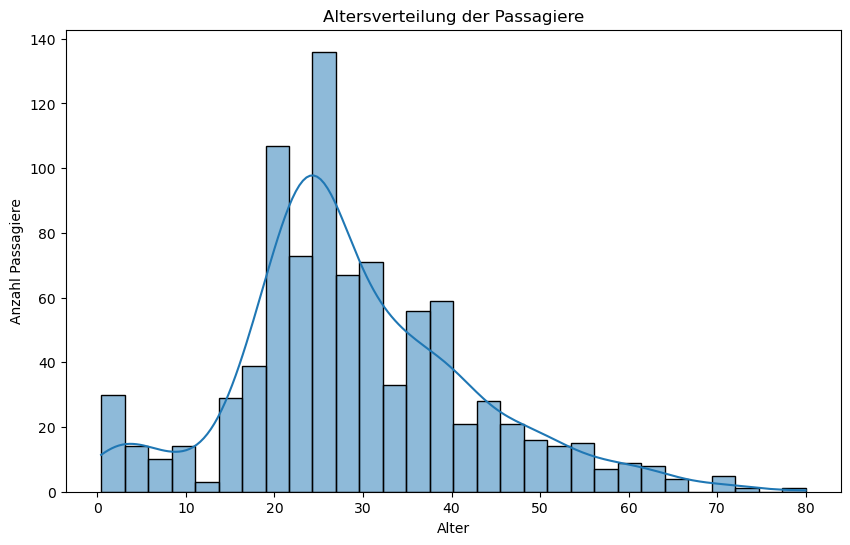

In [36]:
#Alterverteilung
plt.figure(figsize=(10, 6)) #Größe des PLotts
sb.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Altersverteilung der Passagiere')
plt.xlabel('Alter')
plt.ylabel('Anzahl Passagiere')
plt.show()

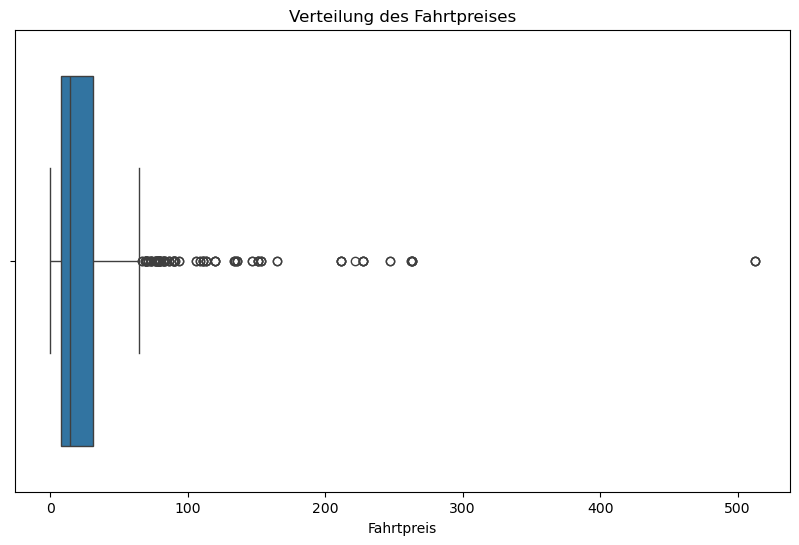

In [37]:
plt.figure(figsize=(10,6))
sb.boxplot(x=titanic_df['Fare'])
plt.title('Verteilung des Fahrtpreises')
plt.xlabel('Fahrtpreis')
plt.show()

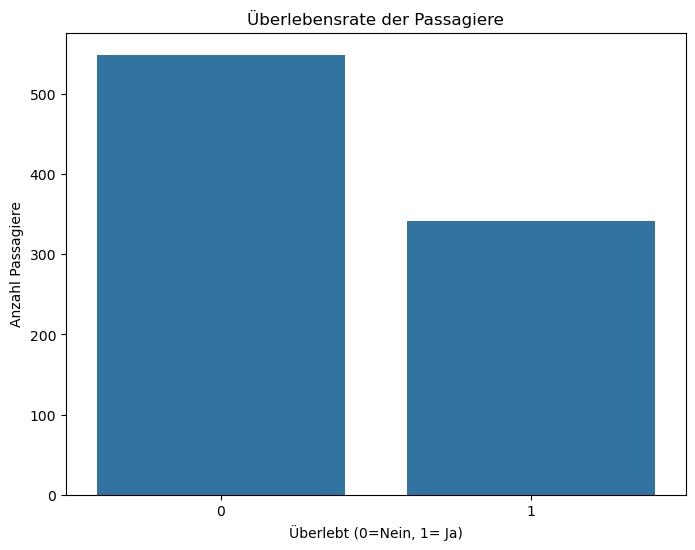

In [40]:
#Überlebensrate
plt.figure(figsize=(8,6))
sb.countplot(x=titanic_df['Survived'])
plt.title('Überlebensrate der Passagiere')
plt.xlabel('Überlebt (0=Nein, 1= Ja)')
plt.ylabel('Anzahl Passagiere')
plt.show()

In [42]:
print(titanic_df['Survived'].value_counts())
print(titanic_df['Survived'].value_counts(normalize=True) * 100)

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [43]:
#Welches Geschelcht hat eher überlebt?
#GroupBy
titanic_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [44]:
#Nun mit einer Pivottabelle
titanic_df.pivot_table(values='Survived', index='Sex', aggfunc = 'mean')

,Survived
Sex,
female,0.742038
male,0.188908


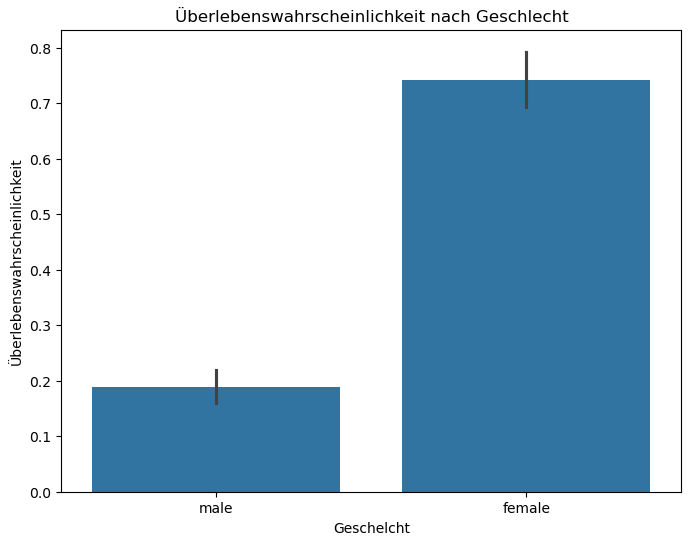

In [46]:
#Nun grafisch veranschualichen
plt.figure(figsize=(8,6))
sb.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Überlebenswahrscheinlichkeit nach Geschlecht')
plt.xlabel('Geschelcht')
plt.ylabel('Überlebenswahrscheinlichkeit')
plt.show()

In [48]:
#Überlebenswahrscheinlichkeit hinsichtlich der Ticketklasse
titanic_df.pivot_table(values='Survived', index='Pclass', aggfunc='mean')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


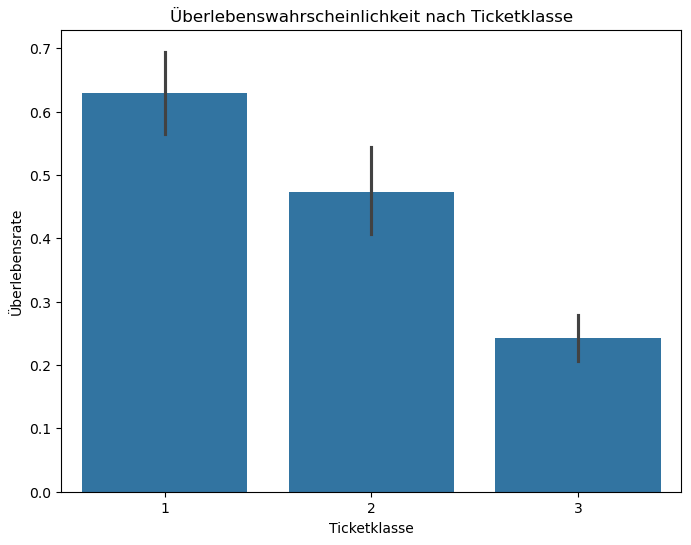

In [49]:
#Nun das visuelle
plt.figure(figsize=(8,6))
sb.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Überlebenswahrscheinlichkeit nach Ticketklasse')
plt.xlabel('Ticketklasse')
plt.ylabel('Überlebensrate')
plt.show()

In [51]:
#Kombinieren von Ticketklasse und Geschlecht
titanic_df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


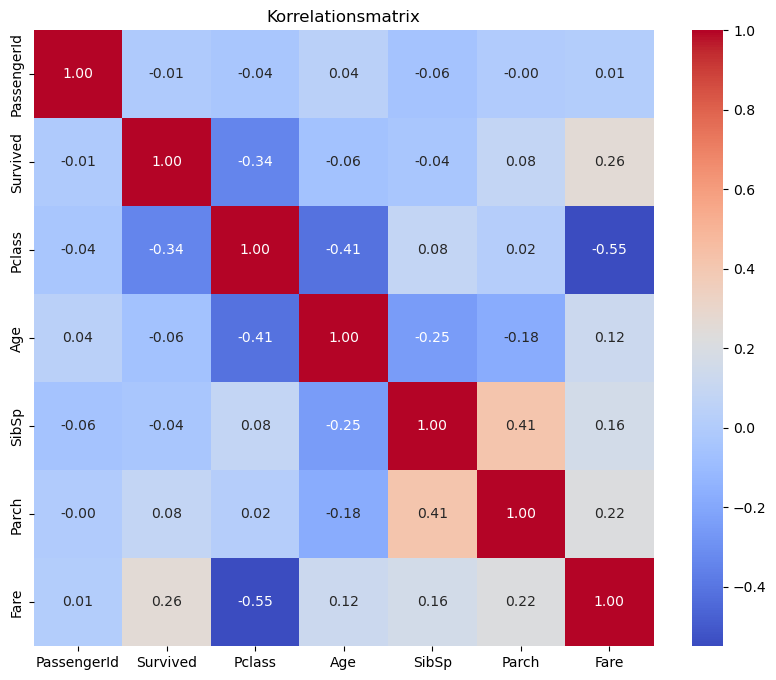

In [57]:
#Heatmap für Korellationen
plt.figure(figsize=(10,8))
sb.heatmap(titanic_df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

Nun erstellen wir eine logistische Regression

In [58]:
#Nochmal den Datensatz angucken
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [62]:
#DIe nicht numerischen Features müssen in numerische Bezeichnungen umgewandelt werden, damit das Modell auf dem gesamten Datensatz trainiert werden kann.
#Außerdem wird die Namensspalte und die Ticketspalte entfernt
titanic_log = titanic_df.drop(columns = ['Name','Ticket'])
titanic_log.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [63]:
titanic_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [64]:
#Die Geschlechter müssen in numerische Features umgewandelt werden
#Männlich=0, Weiblich = 1
titanic_log['Sex'] = titanic_log['Sex'].replace({'male':0, 'female':1})
titanic_log.head()

C:\Users\steue\AppData\Local\Temp\ipykernel_16824\794238216.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_log['Sex'] = titanic_log['Sex'].replace({'male':0, 'female':1})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [65]:
titanic_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [66]:
titanic_log['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [67]:
#Nun muss noch der Eintriegshafen auf die Selbe Weise kodiert werden
titanic_log['Embarked'] = titanic_log['Embarked'].replace({'S':1, 'C':2, 'Q':3})
titanic_log.head()

C:\Users\steue\AppData\Local\Temp\ipykernel_16824\1348857413.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_log['Embarked'] = titanic_log['Embarked'].replace({'S':1, 'C':2, 'Q':3})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


In [68]:
#Für ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [69]:
#Aufteilung in Features und Zielvariable
X = titanic_log.drop(columns=['PassengerId','Survived'])
Y = titanic_log['Survived']

In [71]:
#Datensatz in Trainings und Testdaten teilen
#20% der Daten sind die Testdaten
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,      # 20% Testdaten
    random_state=42
)


In [75]:
#Für bessere Ergebnisse die Daten Normalisieren
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [79]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [76]:
#Model erstellen
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [77]:
#Vorhersage auf den Testdaten machen
y_pred = model.predict(X_test)

In [78]:
#Evaluiere das Model
#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))
#Report
print(classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587
[[92 13]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [80]:
#Nun die ROC-AUC-Kurve berechnen
from sklearn.metrics import roc_curve, roc_auc_score


In [81]:
#Nun brauche ich die W-Keit, die mein MOdell den Klassen zuordnet
y_prob = model.predict_proba(X_test)[:, 1]

In [82]:
#Als nächstes berechne ich die ROC und AUC Werte
fpr, trp, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

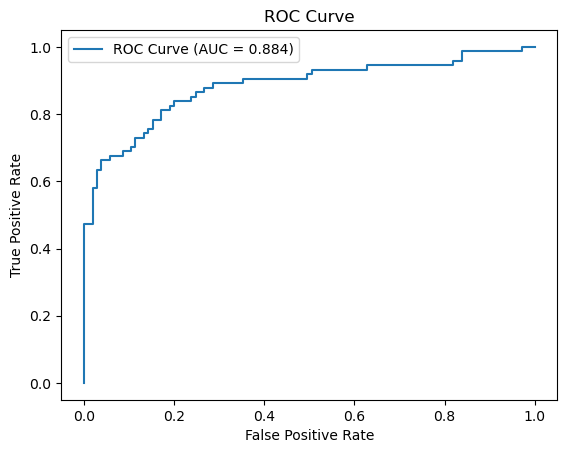

In [84]:
#Nun plotten wir die Kurve
plt.figure()
plt.plot(fpr,trp, label=f'ROC Curve (AUC = {auc:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [85]:
#Nun noch den Gini-Koeffizienten ausrechenen
gini = 2 * auc - 1

print("AUC:", auc)
print("Gini:", gini)

AUC: 0.8835263835263835
Gini: 0.7670527670527669
